# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [54]:
! git clone https://www.github.com/Ipshi02/assignment4

fatal: destination path 'assignment4' already exists and is not an empty directory.


In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

1. Load cars_hw.csv. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [56]:
df = pd.read_csv("/content/assignment4/data/cars_hw.csv")
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [57]:
column_types = df.dtypes
print(column_types)

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object


In [58]:

# df['Color'] = df['Color'].astype(str)
# df['Body_Type'] = df["Body_Type"].astype(str)
# df['Fuel_Type'] = df['Fuel_Type'].astype(str)
# df['Transmission'] = df['Transmission'].astype(str)
# df['Transmission_Type'] = df['Transmission_Type'].astype(str)
df.loc[ df["No_of_Owners"] == "1st","No_of_Owners" ] = 1
df.loc[ df["No_of_Owners"] == "2nd","No_of_Owners"] = 2
df.loc[ df["No_of_Owners"] == "3rd","No_of_Owners" ] = 3
df["No_of_Owners"] = df["No_of_Owners"].astype(int)



In [59]:
df["No_of_Owners"].unique()

array([1, 2, 3])

In [60]:
df["Price"].unique

<bound method Series.unique of 0       657000
1       682000
2       793000
3       414000
4       515000
        ...   
971     956000
972    1027000
973     736000
974     749000
975     691000
Name: Price, Length: 976, dtype: int64>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Volkswagen'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Renault'),
  Text(4, 0, 'Tata'),
  Text(5, 0, 'Chevrolet'),
  Text(6, 0, 'Maruti Suzuki'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Mahindra'),
  Text(9, 0, 'Ford'),
  Text(10, 0, 'Nissan'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'MG Motors'),
  Text(13, 0, 'Kia'),
  Text(14, 0, 'Skoda'),
  Text(15, 0, 'Datsun')])

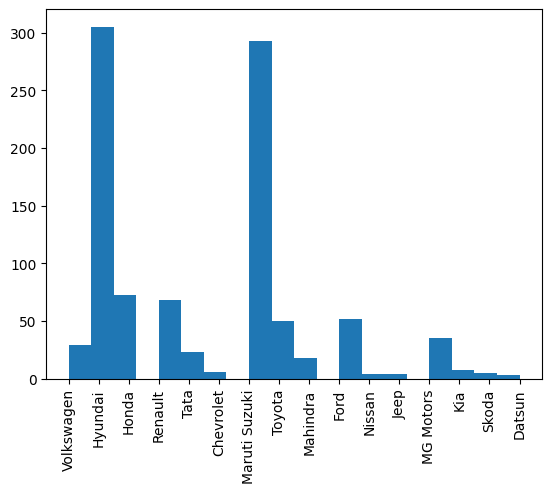

In [61]:
df["Make"].hist(bins=20,grid=False,) # just seeing the most common makes
plt.xticks(rotation=90)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000')])

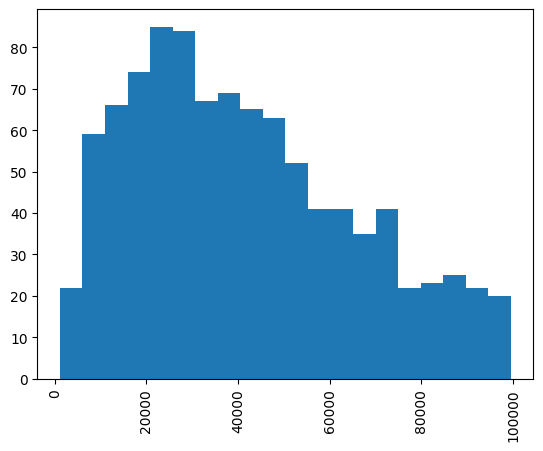

In [62]:
df["Mileage_Run"].hist(bins=20,grid=False,) #data skewed more towards left, prices around 20-30k most common
plt.xticks(rotation=90)

{'whiskers': [<matplotlib.lines.Line2D at 0x7aeae8271f30>,
 'caps': [<matplotlib.lines.Line2D at 0x7aeae8272470>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aeae8271c90>],
 'medians': [<matplotlib.lines.Line2D at 0x7aeae82729e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aeae8272c80>],
 'means': []}

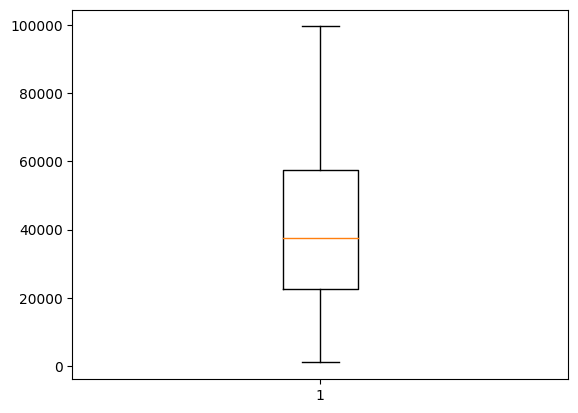

In [63]:
plt.boxplot(df["Mileage_Run"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7aeae80f0820>,
 'caps': [<matplotlib.lines.Line2D at 0x7aeae80f0d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aeae80f0580>],
 'medians': [<matplotlib.lines.Line2D at 0x7aeae80f12d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aeae80f1570>],
 'means': []}

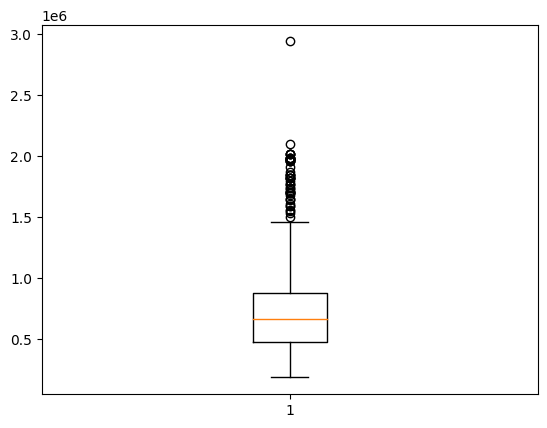

In [64]:
plt.boxplot(df["Price"]) #make boxplot for price - a ton of outliers

In [65]:
df["Price_arc"] = np.arcsinh(df["Price"]) #rescaling by transforming to arcsinh

{'whiskers': [<matplotlib.lines.Line2D at 0x7aeae813bac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7aeae8170040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aeae813b820>],
 'medians': [<matplotlib.lines.Line2D at 0x7aeae8170580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aeae8170820>],
 'means': []}

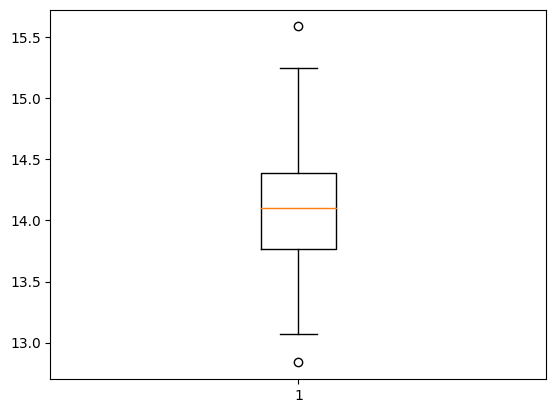

In [66]:
plt.boxplot(df["Price_arc"])

In [67]:
# drop the outliers from Price
include = (df['Price_arc']<15.3) *(df['Price_arc'] > 13.0)
df = df.loc[include,:]

In [68]:
shape = df.shape

print(shape)

(974, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x7aeae7fb2830>,
 'caps': [<matplotlib.lines.Line2D at 0x7aeae7fb2d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aeae7fb2590>],
 'medians': [<matplotlib.lines.Line2D at 0x7aeae7fb31c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aeae7fb3460>],
 'means': []}

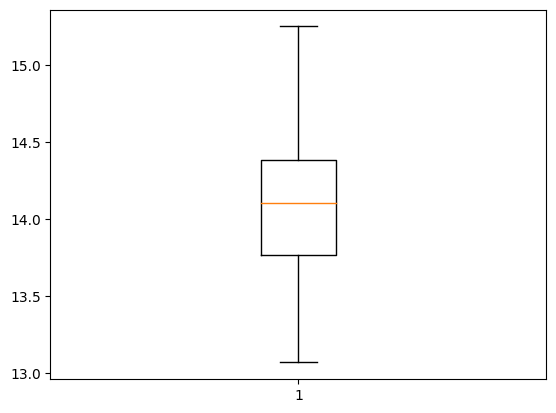

In [69]:
plt.boxplot(df["Price_arc"]) # looks much better, outliers are removed

<Axes: xlabel='Mileage_Run', ylabel='Price'>

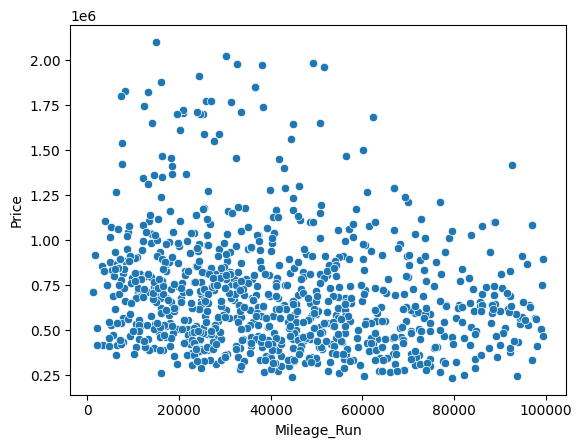

In [70]:
sns.scatterplot(data=df,y="Price",x="Mileage_Run")

 2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

In [71]:
summary = df["Price_arc"].describe()
print(summary)
counts = df["Price_arc"].value_counts()
print(counts)

count    974.000000
mean      14.103958
std        0.446380
min       13.068963
25%       13.766845
50%       14.102942
75%       14.383944
max       15.250595
Name: Price_arc, dtype: float64
14.272935    8
14.418733    7
13.979329    7
14.535300    6
14.266586    6
            ..
14.383095    1
14.084010    1
14.052951    1
14.292986    1
14.202133    1
Name: Price_arc, Length: 583, dtype: int64


<Axes: xlabel='Price_arc', ylabel='Density'>

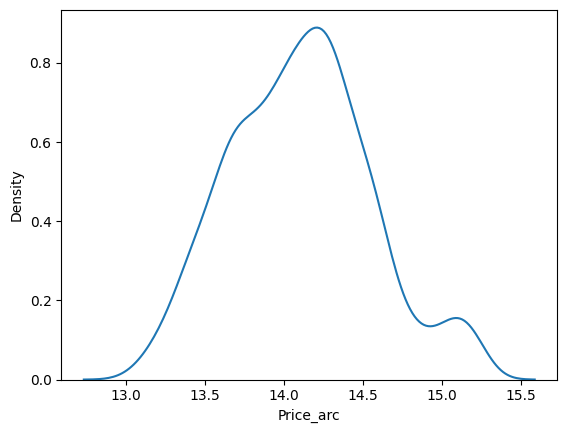

In [72]:
sns.kdeplot(df["Price_arc"])

In [73]:
grouped_df = df.groupby("Price")["Make"].describe()
print(grouped_df)

        count unique            top freq
Price                                   
237000      1      1  Maruti Suzuki    1
239000      1      1           Tata    1
245000      1      1  Maruti Suzuki    1
248000      1      1        Hyundai    1
255000      1      1  Maruti Suzuki    1
...       ...    ...            ...  ...
1972000     1      1           Tata    1
1978000     4      1      MG Motors    4
1984000     4      1      MG Motors    4
2019000     4      1      MG Motors    4
2100000     1      1           Tata    1

[583 rows x 4 columns]


Text(0.5, 1.0, 'Grouped Kernel Density Plot')

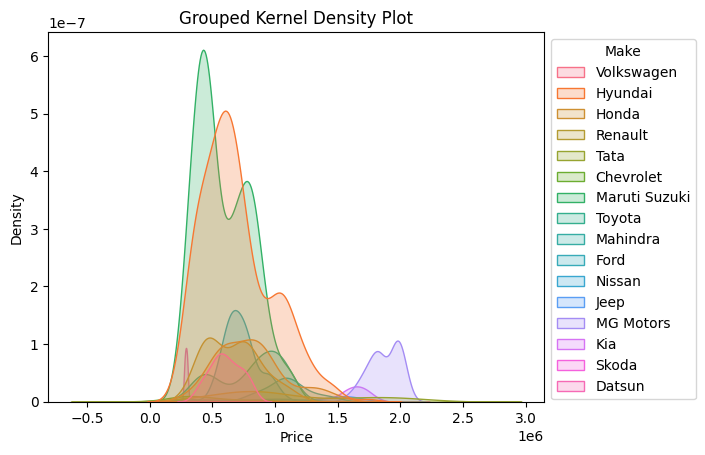

In [74]:
kde = sns.kdeplot(data=df, x= "Price", hue= "Make", fill=True) #https://chat.openai.com/c/71008847-1cca-4cb8-b475-e39ddadda03b
sns.move_legend(kde, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Price")
plt.ylabel("Density")
plt.title('Grouped Kernel Density Plot')

Most of the prices seem to average around 14.1, which is on the higher side. There are also a lot of Volkswagon's selling for the same price which is surprising. There are a lot of Hyundai cars being sold, so that could explain the wide range of prices for that specific brand. The most expensive cars seem to be Kias, MG motors, and Tata/Renault cars (which I have never heard of).

3. Split the data into a 80/20 training set.

In [75]:
y = df["Price_arc"]
vars = ["Make","Make_Year", "Color",	"Body_Type",	"Mileage_Run",	"No_of_Owners",	"Seating_Capacity",	"Fuel_Type",	"Transmission",	"Transmission_Type"]
X = df.loc[:,vars]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the te

In [76]:
from sklearn.linear_model import LinearRegression # Import linear regression model

X_train_numeric = X_train.loc[:,["Mileage_Run","Seating_Capacity", "No_of_Owners", "Make_Year"] ] #only train numeric variables
reg = LinearRegression().fit(X_train_numeric, y_train) # Fit the linear model

X_test_numeric = X_test.loc[:,["Mileage_Run","Seating_Capacity", "No_of_Owners", "Make_Year"] ] #only test numeric variables
print('R2: ', reg.score(X_test_numeric, y_test)) # R squared measure
y_hat = reg.predict(X_test_numeric)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure


R2:  0.30171697506198836
RMSE:  0.35484133927404293


In [78]:
# from sklearn.linear_model import LinearRegression # Import linear regression model

# # first have to create dummies for these variables

X = df["Make", "Color", "Body_Type", "Fuel_Type", "Transmission"]
dummies = pd.concat([ pd.get_dummies(X_train['Make'],dtype='int',drop_first=True ),
                      pd.get_dummies(X_train['Color'],dtype='int',drop_first=True ),
                      pd.get_dummies(X_train['Body_Type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Fuel_Type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Transmission'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Transmission_Type'],dtype='int',drop_first=True)],axis=1)

X_train_cat = X_train.loc[:,["Make","Color", "Body_Type", "Fuel_Type", "Transmission", "Transmission_Type" ] ] #only train categorical variables
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

reg = LinearRegression().fit(X_train_cat, y_train) # Fit the linear model



dummies_test = pd.concat([ pd.get_dummies(X_test['Make'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Color'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Body_Type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Fuel_Type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Transmission'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Transmission_Type'],dtype='int',drop_first=True)],axis=1)

X_test_cat = X_test.loc[:,["Make","Color", "Body_Type", "Fuel_Type", "Transmission", "Transmission_Type" ] ] #only test categorical variables


print('R2: ', reg.score(X_test_cat, y_test)) # R squared measure
y_hat = reg.predict(X_test_cat)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure


ValueError: ignored

This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

- Wife's age (numerical)
- Wife's education (categorical) 1=low, 2, 3, 4=high
- Husband's education (categorical) 1=low, 2, 3, 4=high
- Number of children ever born (numerical)
- Wife's religion (binary) 0=Non-Islam, 1=Islam
- Wife's now working? (binary) 0=Yes, 1=No
- Husband's occupation (categorical) 1, 2, 3, 4
- Standard-of-living index (categorical) 1=low, 2, 3, 4=high
- Media exposure (binary) 0=Good, 1=Not good
- Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

Load the contraceptiveMethodChoice.csv data. Tabulate the method variable (i.e. .value_counts()). 1 corresponds to No Contraception, 3 corresponds to Short Term (e.g. condoms, birth control pills), and 2 corresponds to Long Term (e.g. IUD, sterilization). Cross tabulate method and numberChildren. Do couples that use birth control tend to have more children than those who don't?
Split the sample into ~80% training data and ~20% testing data.
We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a
 matrix instead of
.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
Why can't you use a linear probability model to do this exercise? Explain clearly in words.